# Section 1: Data Loading and Preprocessing

## Online Shoppers Purchasing Intention Dataset Analysis

This notebook handles the data loading and preprocessing for the Online Shoppers Purchasing Intention Dataset from UCI ML Repository.

**Dataset Information:**
- **Source**: UCI ML Repository (ID: 468)
- **Task**: Binary classification of purchasing intention
- **Features**: 17 features (10 numerical, 7 categorical)
- **Classes**: 2 classes (Revenue: True/False)
- **Samples**: 12,330 instances

**Analysis Components:**
- Data loading and exploration
- Feature analysis and visualization
- Data preprocessing and encoding
- Train/validation/test splits
- Feature scaling
- Class imbalance analysis

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# UCI ML Repository
from ucimlrepo import fetch_ucirepo

# Set random seeds for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Section 1: Data Loading and Preprocessing")
print("Dataset: Online Shoppers Purchasing Intention")

📊 Section 1: Data Loading and Preprocessing
Dataset: Online Shoppers Purchasing Intention


## 1.1 Data Loading

In [2]:
# Load the Online Shoppers Purchasing Intention Dataset
print("Loading Online Shoppers Dataset...")
online_original = fetch_ucirepo(id=468)
online_shoppers = online_original.data.original

print(f"Dataset shape: {online_shoppers.shape}")
print(f"\nDataset info:")
print(online_shoppers.info())

# Display first few rows
print(f"\nFirst 5 rows:")
print(online_shoppers.head())

Loading Online Shoppers Dataset...
Dataset shape: (12330, 18)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13 

In [3]:
# Display class distribution
print(f"\nClass distribution:")
class_counts = online_shoppers['Revenue'].value_counts()
print(class_counts)

# Calculate class imbalance ratios
total_samples = len(online_shoppers)
print(f"\nClass proportions:")
for class_name, count in class_counts.items():
    proportion = count / total_samples * 100
    print(f"  {class_name}: {count} samples ({proportion:.2f}%)")

# Check class imbalance
imbalance_ratio = class_counts[False] / class_counts[True]
print(f"\nClass imbalance ratio (No Purchase : Purchase): {imbalance_ratio:.2f}:1")
print(f"No Purchase: {class_counts[False]} samples")
print(f"Purchase: {class_counts[True]} samples")


Class distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Class proportions:
  False: 10422 samples (84.53%)
  True: 1908 samples (15.47%)

Class imbalance ratio (No Purchase : Purchase): 5.46:1
No Purchase: 10422 samples
Purchase: 1908 samples


## 1.2 Feature Analysis

In [4]:
# Analyze features
feature_columns = [col for col in online_shoppers.columns if col != 'Revenue']
print(f"Number of features: {len(feature_columns)}")
print(f"\nFeature names:")
for i, feature in enumerate(feature_columns, 1):
    print(f"  {i:2d}. {feature}")

# Identify numerical and categorical features
numerical_features = online_shoppers.select_dtypes(include=[np.number]).columns.tolist()
if 'Revenue' in numerical_features:
    numerical_features.remove('Revenue')

categorical_features = ['Month', 'VisitorType', 'Weekend']

print(f"\nNumerical features ({len(numerical_features)}):")
for i, feature in enumerate(numerical_features, 1):
    print(f"  {i:2d}. {feature}")

print(f"\nCategorical features ({len(categorical_features)}):")
for i, feature in enumerate(categorical_features, 1):
    print(f"  {i:2d}. {feature}")

Number of features: 17

Feature names:
   1. Administrative
   2. Administrative_Duration
   3. Informational
   4. Informational_Duration
   5. ProductRelated
   6. ProductRelated_Duration
   7. BounceRates
   8. ExitRates
   9. PageValues
  10. SpecialDay
  11. Month
  12. OperatingSystems
  13. Browser
  14. Region
  15. TrafficType
  16. VisitorType
  17. Weekend

Numerical features (14):
   1. Administrative
   2. Administrative_Duration
   3. Informational
   4. Informational_Duration
   5. ProductRelated
   6. ProductRelated_Duration
   7. BounceRates
   8. ExitRates
   9. PageValues
  10. SpecialDay
  11. OperatingSystems
  12. Browser
  13. Region
  14. TrafficType

Categorical features (3):
   1. Month
   2. VisitorType
   3. Weekend


In [5]:
# Feature statistics for numerical features
print(f"\nNumerical feature statistics:")
print(online_shoppers[numerical_features].describe())


Numerical feature statistics:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%          

In [6]:
# Analyze categorical features
print(f"\nCategorical feature analysis:")
for feature in categorical_features:
    print(f"\n{feature}:")
    value_counts = online_shoppers[feature].value_counts()
    print(value_counts)
    print(f"  Unique values: {len(value_counts)}")


Categorical feature analysis:

Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64
  Unique values: 10

VisitorType:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64
  Unique values: 3

Weekend:
Weekend
False    9462
True     2868
Name: count, dtype: int64
  Unique values: 2


In [7]:
# Check for missing values
print("Missing values per column:")
missing_values = online_shoppers.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found")
else:
    print(missing_values[missing_values > 0])

# Check data types
print(f"\nData types:")
print(online_shoppers.dtypes)

Missing values per column:
✅ No missing values found

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


## 1.3 Data Visualization

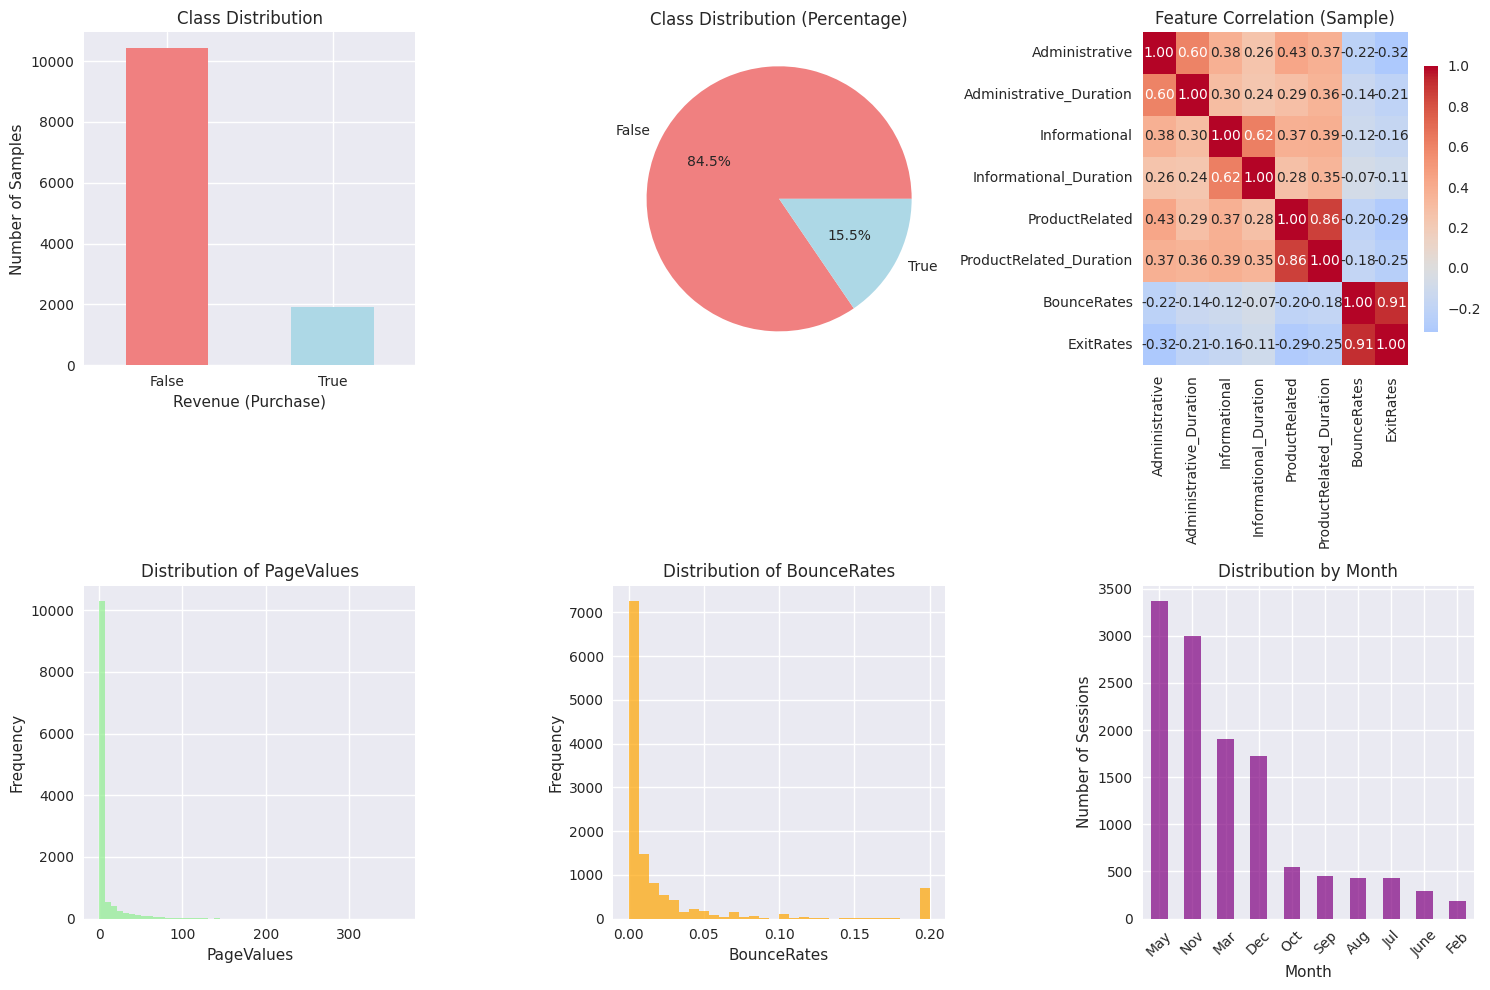

In [9]:
# Visualize class distribution
plt.figure(figsize=(15, 10))

# Class distribution bar plot
plt.subplot(2, 3, 1)
class_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Class Distribution')
plt.xlabel('Revenue (Purchase)')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)

# Class distribution pie chart
plt.subplot(2, 3, 2)
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Class Distribution (Percentage)')
plt.ylabel('')

# Feature correlation heatmap (sample of numerical features)
plt.subplot(2, 3, 3)
sample_features = numerical_features[:8]  # First 8 numerical features
corr_matrix = online_shoppers[sample_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation (Sample)')

# PageValues distribution (important feature)
plt.subplot(2, 3, 4)
plt.hist(online_shoppers['PageValues'], bins=50, alpha=0.7, color='lightgreen')
plt.title('Distribution of PageValues')
plt.xlabel('PageValues')
plt.ylabel('Frequency')

# BounceRates distribution
plt.subplot(2, 3, 5)
plt.hist(online_shoppers['BounceRates'], bins=30, alpha=0.7, color='orange')
plt.title('Distribution of BounceRates')
plt.xlabel('BounceRates')
plt.ylabel('Frequency')

# Month distribution
plt.subplot(2, 3, 6)
month_counts = online_shoppers['Month'].value_counts()
month_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('./Section1_data_preprocessing/class_and_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Feature distributions by class (for selected important features)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Select 6 most important features for visualization
important_features = ['PageValues', 'ExitRates', 'BounceRates', 'ProductRelated_Duration', 'Administrative_Duration', 'Informational_Duration']

for i, feature in enumerate(important_features):
    for revenue_class in [False, True]:
        class_data = online_shoppers[online_shoppers['Revenue'] == revenue_class][feature]
        label = 'No Purchase' if revenue_class == False else 'Purchase'
        color = 'lightcoral' if revenue_class == False else 'lightblue'
        axes[i].hist(class_data, alpha=0.6, label=label, bins=30, color=color)
    
    axes[i].set_title(f'Distribution of {feature} by Class')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('online_shoppers/Section1_data_preprocessing/feature_distributions_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

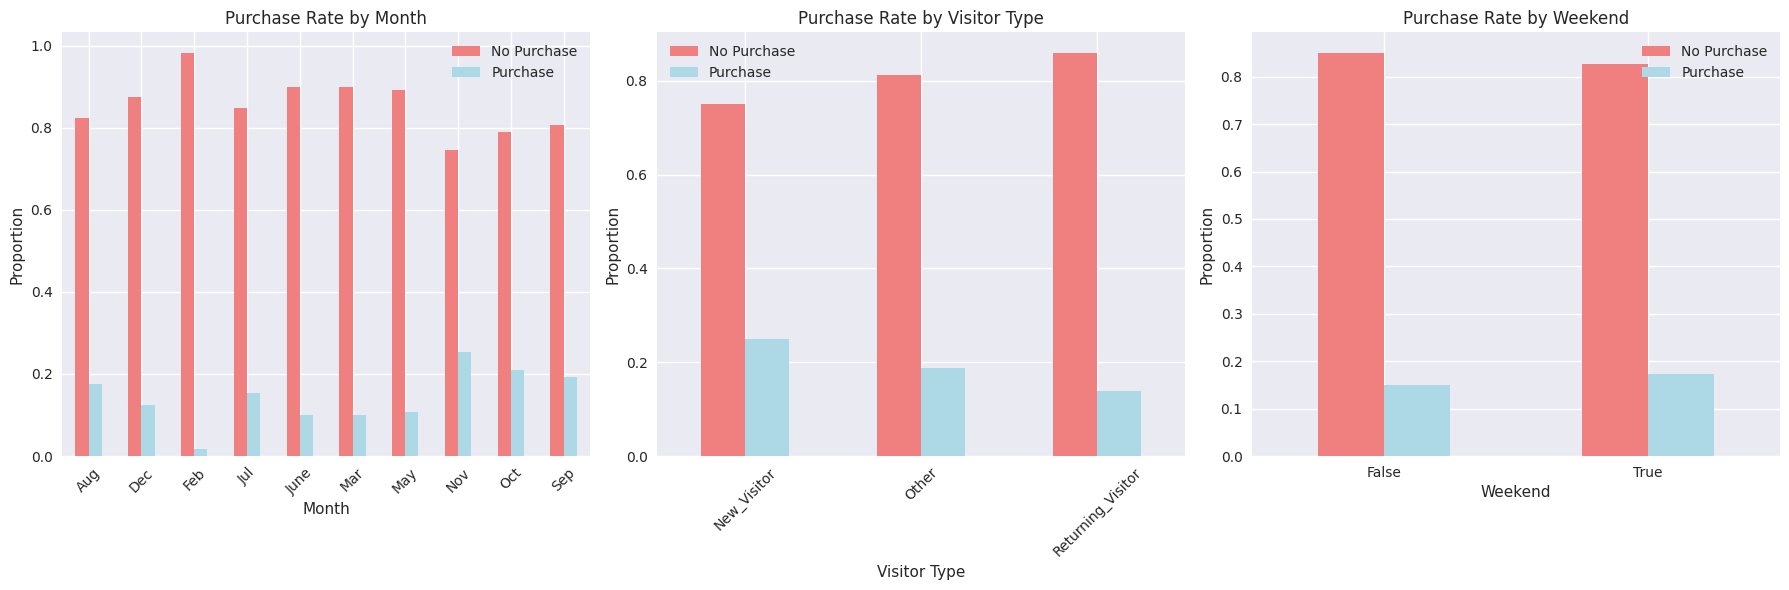

In [10]:
# Categorical features analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Month vs Revenue
month_revenue = pd.crosstab(online_shoppers['Month'], online_shoppers['Revenue'], normalize='index')
month_revenue.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Purchase Rate by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Proportion')
axes[0].legend(['No Purchase', 'Purchase'])
axes[0].tick_params(axis='x', rotation=45)

# VisitorType vs Revenue
visitor_revenue = pd.crosstab(online_shoppers['VisitorType'], online_shoppers['Revenue'], normalize='index')
visitor_revenue.plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightblue'])
axes[1].set_title('Purchase Rate by Visitor Type')
axes[1].set_xlabel('Visitor Type')
axes[1].set_ylabel('Proportion')
axes[1].legend(['No Purchase', 'Purchase'])
axes[1].tick_params(axis='x', rotation=45)

# Weekend vs Revenue
weekend_revenue = pd.crosstab(online_shoppers['Weekend'], online_shoppers['Revenue'], normalize='index')
weekend_revenue.plot(kind='bar', ax=axes[2], color=['lightcoral', 'lightblue'])
axes[2].set_title('Purchase Rate by Weekend')
axes[2].set_xlabel('Weekend')
axes[2].set_ylabel('Proportion')
axes[2].legend(['No Purchase', 'Purchase'])
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('./Section1_data_preprocessing/categorical_features_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.4 Data Preprocessing

In [11]:
# Preprocessing
df = online_shoppers.copy()

# Encode categorical features
label_encoder_month = LabelEncoder()
label_encoder_visitor = LabelEncoder()

df['Month'] = label_encoder_month.fit_transform(df['Month'])
df['VisitorType'] = label_encoder_visitor.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Create encoding mappings for reference
month_mapping = dict(zip(label_encoder_month.classes_, label_encoder_month.transform(label_encoder_month.classes_)))
visitor_mapping = dict(zip(label_encoder_visitor.classes_, label_encoder_visitor.transform(label_encoder_visitor.classes_)))

print("Encoding mappings:")
print(f"\nMonth encoding:")
for original, encoded in month_mapping.items():
    print(f"  {original} -> {encoded}")

print(f"\nVisitorType encoding:")
for original, encoded in visitor_mapping.items():
    print(f"  {original} -> {encoded}")

print(f"\nWeekend encoding: False -> 0, True -> 1")
print(f"Revenue encoding: False -> 0, True -> 1")

Encoding mappings:

Month encoding:
  Aug -> 0
  Dec -> 1
  Feb -> 2
  Jul -> 3
  June -> 4
  Mar -> 5
  May -> 6
  Nov -> 7
  Oct -> 8
  Sep -> 9

VisitorType encoding:
  New_Visitor -> 0
  Other -> 1
  Returning_Visitor -> 2

Weekend encoding: False -> 0, True -> 1
Revenue encoding: False -> 0, True -> 1


In [12]:
# Define feature names
feature_names = [
    'Administrative', 'Administrative_Duration', 'Informational', 
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
    'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
    'VisitorType', 'Weekend'
]

print(f"Feature names ({len(feature_names)} features):")
for i, name in enumerate(feature_names, 1):
    print(f"  {i:2d}. {name}")

Feature names (17 features):
   1. Administrative
   2. Administrative_Duration
   3. Informational
   4. Informational_Duration
   5. ProductRelated
   6. ProductRelated_Duration
   7. BounceRates
   8. ExitRates
   9. PageValues
  10. SpecialDay
  11. Month
  12. OperatingSystems
  13. Browser
  14. Region
  15. TrafficType
  16. VisitorType
  17. Weekend


In [13]:
# Separate features and target
X = df.drop(columns=['Revenue']).values
y = df['Revenue'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class labels: {sorted(np.unique(y))}")

# Verify feature statistics
print(f"\nFeature value ranges (first 5 features):")
for i, feature_name in enumerate(feature_names[:5]):
    print(f"  {feature_name}: [{X[:, i].min():.2f}, {X[:, i].max():.2f}]")
print("  ...")

Features shape: (12330, 17)
Target shape: (12330,)
Number of classes: 2
Class labels: [0, 1]

Feature value ranges (first 5 features):
  Administrative: [0.00, 27.00]
  Administrative_Duration: [0.00, 3398.75]
  Informational: [0.00, 24.00]
  Informational_Duration: [0.00, 2549.38]
  ProductRelated: [0.00, 705.00]
  ...


## 1.5 Data Splitting

In [14]:
# Split the data
# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 80% train, 20% val (of the temp set)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Check class distribution in splits
print(f"\nClass distribution in splits:")
train_dist = np.bincount(y_train)
val_dist = np.bincount(y_val)
test_dist = np.bincount(y_test)

print(f"Training:   {train_dist} (No Purchase: {train_dist[0]}, Purchase: {train_dist[1]})")
print(f"Validation: {val_dist} (No Purchase: {val_dist[0]}, Purchase: {val_dist[1]})")
print(f"Test:       {test_dist} (No Purchase: {test_dist[0]}, Purchase: {test_dist[1]})")

# Verify proportions are maintained
print(f"\nClass proportions in training set:")
print(f"  No Purchase (class 0): {train_dist[0]/len(y_train)*100:.2f}%")
print(f"  Purchase (class 1): {train_dist[1]/len(y_train)*100:.2f}%")

print(f"\nClass imbalance ratio in training set: {train_dist[0]/train_dist[1]:.2f}:1")

Training set: (7891, 17)
Validation set: (1973, 17)
Test set: (2466, 17)

Class distribution in splits:
Training:   [6670 1221] (No Purchase: 6670, Purchase: 1221)
Validation: [1668  305] (No Purchase: 1668, Purchase: 305)
Test:       [2084  382] (No Purchase: 2084, Purchase: 382)

Class proportions in training set:
  No Purchase (class 0): 84.53%
  Purchase (class 1): 15.47%

Class imbalance ratio in training set: 5.46:1


## 1.6 Feature Scaling

In [15]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training set: {X_train_scaled.shape}")
print(f"Scaled validation set: {X_val_scaled.shape}")
print(f"Scaled test set: {X_test_scaled.shape}")

# Verify scaling worked correctly
print(f"\nScaling verification (training set):")
print(f"  Mean (should be ~0): {X_train_scaled.mean(axis=0)[:3]}...")
print(f"  Std (should be ~1):  {X_train_scaled.std(axis=0)[:3]}...")

# Show scaling effect on sample features
sample_features_idx = [0, 6, 8]  # Administrative, BounceRates, PageValues
print(f"\nScaling effect on sample features:")
for idx in sample_features_idx:
    feature_name = feature_names[idx]
    print(f"  {feature_name}:")
    print(f"    Original range: [{X_train[:, idx].min():.2f}, {X_train[:, idx].max():.2f}]")
    print(f"    Scaled range:   [{X_train_scaled[:, idx].min():.2f}, {X_train_scaled[:, idx].max():.2f}]")

Scaled training set: (7891, 17)
Scaled validation set: (1973, 17)
Scaled test set: (2466, 17)

Scaling verification (training set):
  Mean (should be ~0): [2.69515046e-16 2.92620657e-16 1.76797143e-16]...
  Std (should be ~1):  [1. 1. 1.]...

Scaling effect on sample features:
  Administrative:
    Original range: [0.00, 24.00]
    Scaled range:   [-0.69, 6.53]
  BounceRates:
    Original range: [0.00, 0.20]
    Scaled range:   [-0.46, 3.59]
  PageValues:
    Original range: [0.00, 361.76]
    Scaled range:   [-0.32, 18.86]


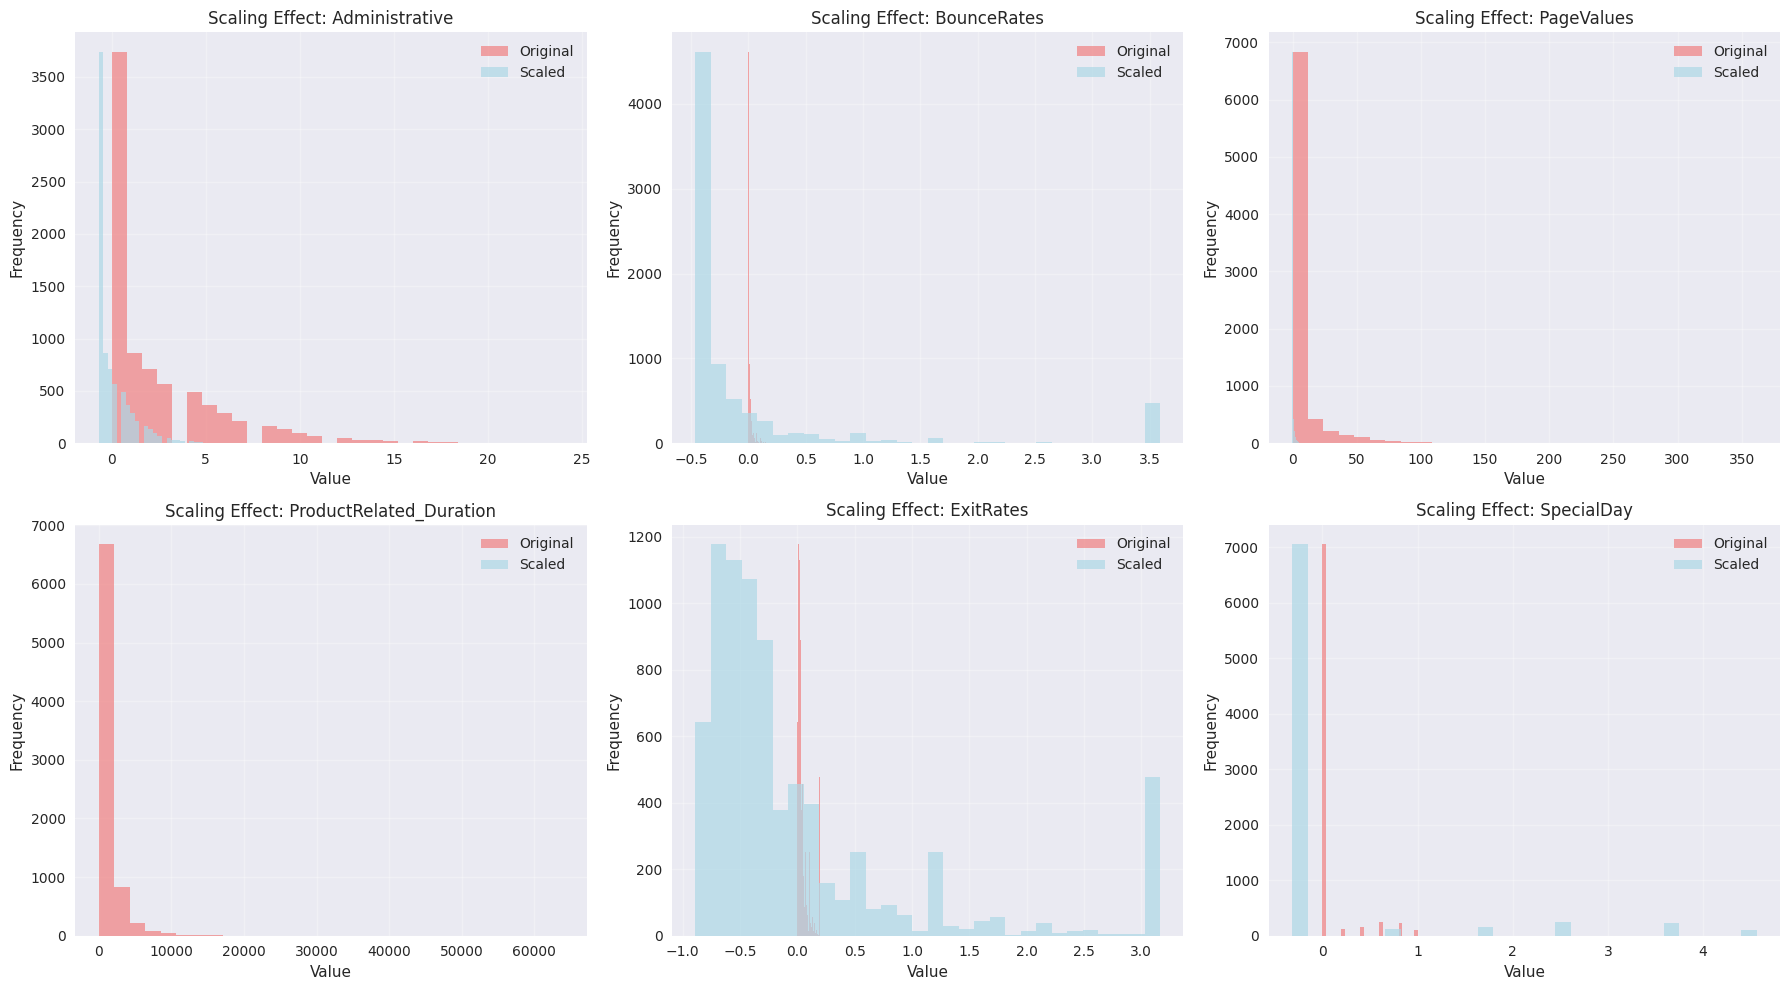

In [17]:
# Visualize scaling effect
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Select features to visualize scaling effect
features_to_plot = ['Administrative', 'BounceRates', 'PageValues', 'ProductRelated_Duration', 'ExitRates', 'SpecialDay']
feature_indices = [feature_names.index(f) for f in features_to_plot]

for i, (feature_name, feature_idx) in enumerate(zip(features_to_plot, feature_indices)):
    # Original data
    axes[i].hist(X_train[:, feature_idx], bins=30, alpha=0.7, label='Original', color='lightcoral')
    # Scaled data
    axes[i].hist(X_train_scaled[:, feature_idx], bins=30, alpha=0.7, label='Scaled', color='lightblue')
    
    axes[i].set_title(f'Scaling Effect: {feature_name}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./Section1_data_preprocessing/feature_scaling_effect.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.7 Data Summary and Export

In [18]:
# Create comprehensive data summary
data_summary = {
    'dataset_info': {
        'name': 'Online Shoppers Purchasing Intention Dataset',
        'source': 'UCI ML Repository (ID: 468)',
        'total_samples': len(online_shoppers),
        'num_features': len(feature_names),
        'num_classes': 2,
        'class_names': ['No Purchase', 'Purchase'],
        'task_type': 'Binary Classification'
    },
    'data_splits': {
        'train_size': len(X_train),
        'val_size': len(X_val),
        'test_size': len(X_test),
        'train_ratio': len(X_train) / len(online_shoppers),
        'val_ratio': len(X_val) / len(online_shoppers),
        'test_ratio': len(X_test) / len(online_shoppers)
    },
    'class_distribution': {
        'No Purchase': int(class_counts[False]),
        'Purchase': int(class_counts[True]),
        'imbalance_ratio': float(class_counts[False] / class_counts[True])
    },
    'feature_info': {
        'feature_names': feature_names,
        'numerical_features': numerical_features,
        'categorical_features': categorical_features,
        'month_mapping': month_mapping,
        'visitor_mapping': visitor_mapping
    }
}

print("📊 DATA PREPROCESSING SUMMARY")
print("=" * 50)
print(f"Dataset: {data_summary['dataset_info']['name']}")
print(f"Total Samples: {data_summary['dataset_info']['total_samples']:,}")
print(f"Features: {data_summary['dataset_info']['num_features']}")
print(f"Classes: {data_summary['dataset_info']['num_classes']}")
print(f"\nData Splits:")
print(f"  Training:   {data_summary['data_splits']['train_size']:,} ({data_summary['data_splits']['train_ratio']:.1%})")
print(f"  Validation: {data_summary['data_splits']['val_size']:,} ({data_summary['data_splits']['val_ratio']:.1%})")
print(f"  Test:       {data_summary['data_splits']['test_size']:,} ({data_summary['data_splits']['test_ratio']:.1%})")
print(f"\nClass Balance:")
for class_name, count in data_summary['class_distribution'].items():
    if class_name != 'imbalance_ratio':
        percentage = count / data_summary['dataset_info']['total_samples'] * 100
        print(f"  {class_name}: {count:,} ({percentage:.1f}%)")

print(f"\nClass Imbalance Ratio: {data_summary['class_distribution']['imbalance_ratio']:.2f}:1")
print(f"\n✅ Data preprocessing completed successfully!")
print(f"📁 Ready for model training in Section 2")

📊 DATA PREPROCESSING SUMMARY
Dataset: Online Shoppers Purchasing Intention Dataset
Total Samples: 12,330
Features: 17
Classes: 2

Data Splits:
  Training:   7,891 (64.0%)
  Validation: 1,973 (16.0%)
  Test:       2,466 (20.0%)

Class Balance:
  No Purchase: 10,422 (84.5%)
  Purchase: 1,908 (15.5%)

Class Imbalance Ratio: 5.46:1

✅ Data preprocessing completed successfully!
📁 Ready for model training in Section 2


In [20]:
# Save preprocessed data for use in other notebooks
import pickle

# Save all necessary variables
preprocessing_data = {
    'X_train_scaled': X_train_scaled,
    'X_val_scaled': X_val_scaled,
    'X_test_scaled': X_test_scaled,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test,
    'feature_names': feature_names,
    'month_mapping': month_mapping,
    'visitor_mapping': visitor_mapping,
    'label_encoder_month': label_encoder_month,
    'label_encoder_visitor': label_encoder_visitor,
    'scaler': scaler,
    'data_summary': data_summary
}

# Save to pickle file
with open('./online_shoppers_preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessing_data, f)

print("💾 Preprocessed data saved to './online_shoppers_preprocessed_data.pkl'")
print("📋 This file contains all necessary data for Sections 2 and 3")

# Also save a CSV version for easy inspection
df_export = pd.DataFrame(X_train_scaled, columns=feature_names)
df_export['Revenue'] = y_train
df_export.to_csv('./online_shoppers_train_scaled.csv', index=False)
print("📄 Training data also saved as './online_shoppers_train_scaled.csv'")

💾 Preprocessed data saved to './online_shoppers_preprocessed_data.pkl'
📋 This file contains all necessary data for Sections 2 and 3
📄 Training data also saved as './online_shoppers_train_scaled.csv'
